In [5]:
from detectron2.data.datasets import register_coco_instances
import detectron2
import cv2
from matplotlib import pyplot as plt
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
import random
from detectron2.utils.visualizer import Visualizer


In [2]:
register_coco_instances("fruits_nuts", {}, "./mydata/coco.json", "./mydata/images")

In [3]:
fruits_nuts_metadata = detectron2.data.MetadataCatalog.get("fruits_nuts")

In [4]:
dataset_dicts = detectron2.data.DatasetCatalog.get("fruits_nuts")

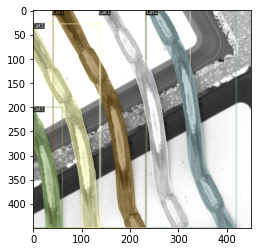

In [15]:

for d in random.sample(dataset_dicts,1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=fruits_nuts_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    a = vis.get_image()[:, :, ::-1]
    plt.imshow(a)

In [6]:

cfg = get_cfg()
cfg.merge_from_file(
    "./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)

In [7]:
cfg.DATASETS.TRAIN = ("fruits_nuts",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = (
    1000
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)


In [8]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)


[01/12 17:46:01 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[01/12 17:46:01 d2.data.datasets.coco]: Loaded 126 images in COCO format from ./mydata/coco.json
[01/12 17:46:01 d2.data.build]: Removed 0 images with no usable annotations. 126 images left.
[01/12 17:46:01 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    Cat1    | 670          |
|            |              |
[01/12 17:46:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[01/12 17:46:01 d2.data.build]: Using training sampler TrainingSampler
[01/12 17:46:01 d2.data.common]: Serializing 126 elements to byte tensors and concatenating them all ...
[01/12 17:46:01 d2.data.common]: Serialized dataset takes 0.12 MiB


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (3, 256, 1, 1) 

In [ ]:
trainer.train()

[01/12 17:46:03 d2.engine.train_loop]: Starting training from iteration 0


d:\pyother\detectron2\detectron2\modeling\roi_heads\fast_rcnn.py:217: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  num_fg = fg_inds.nonzero().numel()


[01/12 17:46:19 d2.utils.events]:  eta: 0:10:04  iter: 19  total_loss: 2.837  loss_cls: 1.047  loss_box_reg: 0.9833  loss_mask: 0.6092  loss_rpn_cls: 0.08744  loss_rpn_loc: 0.08002  time: 0.6165  data_time: 0.1238  lr: 0.00039962  max_mem: 5840M
[01/12 17:46:32 d2.utils.events]:  eta: 0:10:03  iter: 39  total_loss: 1.606  loss_cls: 0.2818  loss_box_reg: 0.8627  loss_mask: 0.3267  loss_rpn_cls: 0.02252  loss_rpn_loc: 0.05568  time: 0.6205  data_time: 0.0032  lr: 0.00079922  max_mem: 5840M
[01/12 17:46:44 d2.utils.events]:  eta: 0:09:48  iter: 59  total_loss: 0.8069  loss_cls: 0.1259  loss_box_reg: 0.4543  loss_mask: 0.1547  loss_rpn_cls: 0.01261  loss_rpn_loc: 0.05537  time: 0.6176  data_time: 0.0032  lr: 0.0011988  max_mem: 5840M
[01/12 17:46:56 d2.utils.events]:  eta: 0:09:34  iter: 79  total_loss: 0.6173  loss_cls: 0.09927  loss_box_reg: 0.3284  loss_mask: 0.1278  loss_rpn_cls: 0.006752  loss_rpn_loc: 0.04976  time: 0.6159  data_time: 0.0034  lr: 0.0015984  max_mem: 5840M
[01/12 17:4

In [33]:
#cfg = get_cfg()
#cfg.merge_from_file(
#    "./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
#)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("fruits_nuts", )
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)

predictor = detectron2.engine.defaults.DefaultPredictor(cfg)

0.026926755905151367,0.06087899208068848


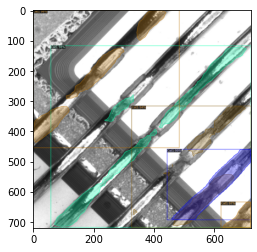

In [35]:
from detectron2.utils.visualizer import ColorMode
import time

for d in random.sample(dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    t0 = time.time()
    outputs = predictor(im)
    t1 = time.time()
    v = Visualizer(im[:, :, ::-1],
                   metadata=fruits_nuts_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    t2 = time.time()
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    a = v.get_image()[:, :, ::-1]
    plt.imshow(a)
    print(f'{t2-t1},{t1-t0}')